In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
from matplotlib import rcParams 
rcParams.update({'font.size': 18})

In [3]:
rawdat = pd.read_csv("/srv/scratch/z3289452/OceanDataScience/Ship_data/NRSPHB_1953_2010.csv")

In [4]:
rawdat.columns

Index(['SURVEY_NAME', 'STATION_NO', 'START_TIME', 'END_TIME', 'MIN_DEPTH',
       'MAX_DEPTH', 'BOTTTOM_DEPTH', 'BOTTOM_TIME', 'BOTTOM_LAT', 'BOTTOM_LON',
       'END_LAT', 'END_LON', 'START_LAT', 'START_LON', 'PROJECT_NAME',
       'MARLIN_ID', 'BOTTLE_NUMBER', 'PRESSURE', 'ROSETTE_POSITION',
       'ROSETTE_POSITION_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG',
       'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG',
       'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SALINITY_VALUE',
       'SALINITY_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG',
       'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'AMMONIA_VALUE',
       'AMMONIA_QC_FLAG'],
      dtype='object')

In [5]:
# rawdat = rawdat.loc[:,~rawdat.columns.isin(['START_TIME'])]
# rawdat.drop(columns=rawdat.columns[[0,1,3,]])
rawdat = rawdat[['START_TIME','PRESSURE', 'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'SALINITY_VALUE', 'SALINITY_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG', 
                 'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG', 'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG', 
                 'AMMONIA_VALUE', 'AMMONIA_QC_FLAG']]
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,< 0.02,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [6]:
rawdat.NITRATE_VALUE = rawdat.NITRATE_VALUE.where(rawdat.NITRATE_VALUE != '< 0.02', '0')
rawdat.NITRATE_VALUE = pd.to_numeric(rawdat.NITRATE_VALUE)
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [7]:
datetime = pd.to_datetime(rawdat.START_TIME, infer_datetime_format=True, dayfirst=True)
rawdat.insert(0,'Year',datetime.dt.year)
rawdat.insert(1,'Yday',datetime.dt.dayofyear)
rawdat.insert(2,'Hour',datetime.dt.hour)
rawdat.drop(columns=['START_TIME'], inplace = True)
rawdat.head()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,1953,151,0,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,1953,151,0,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,1953,151,0,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,1953,151,0,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,1953,151,0,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [22]:
rawdat.Yday.min(), rawdat.Yday.max()/2.0

(0.01721420632103996, 3.1415926535897936)

In [21]:
rawdat.Yday = rawdat.Yday * math.pi / 182.5

In [23]:
nitrate = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrate.dropna(inplace=True)
nitrate = nitrate[(nitrate.NITRATE_QC_FLAG == 0.0) & (nitrate.TEMPERATURE_QC_FLAG == 0.0) & (nitrate.SALINITY_QC_FLAG == 0.0)]
nitrate.head(), nitrate.shape

(    Year      Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 1   1953  2.599345     0      10.0               18.6                  0.0   
 3   1953  2.599345     0      30.0               18.8                  0.0   
 6   1953  2.599345     0      75.0               17.1                  0.0   
 7   1953  2.599345     0     100.0               16.2                  0.0   
 10  1953  2.754273     0      20.0               18.0                  0.0   
 
     SALINITY_VALUE  SALINITY_QC_FLAG  NITRATE_VALUE  NITRATE_QC_FLAG  
 1           35.371               0.0            0.1              0.0  
 3           35.462               0.0            1.2              0.0  
 6           35.480               0.0            3.1              0.0  
 7           35.570               0.0            6.7              0.0  
 10          35.389               0.0            0.2              0.0  ,
 (13193, 10))

In [24]:
nitrate_1985 = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrate_1985.dropna(inplace=True)
nitrate_1985 = nitrate_1985[(nitrate_1985.NITRATE_QC_FLAG == 0.0) & (nitrate_1985.TEMPERATURE_QC_FLAG == 0.0) & (nitrate_1985.SALINITY_QC_FLAG == 0.0) & (nitrate_1985.Year <= 1985)]
nitrate_1985.head(), nitrate_1985.shape

(    Year      Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 1   1953  2.599345     0      10.0               18.6                  0.0   
 3   1953  2.599345     0      30.0               18.8                  0.0   
 6   1953  2.599345     0      75.0               17.1                  0.0   
 7   1953  2.599345     0     100.0               16.2                  0.0   
 10  1953  2.754273     0      20.0               18.0                  0.0   
 
     SALINITY_VALUE  SALINITY_QC_FLAG  NITRATE_VALUE  NITRATE_QC_FLAG  
 1           35.371               0.0            0.1              0.0  
 3           35.462               0.0            1.2              0.0  
 6           35.480               0.0            3.1              0.0  
 7           35.570               0.0            6.7              0.0  
 10          35.389               0.0            0.2              0.0  ,
 (12016, 10))

In [25]:
nitrate_wO2 = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrate_wO2.dropna(inplace=True)
nitrate_wO2 = nitrate_wO2[(nitrate_wO2.NITRATE_QC_FLAG == 0.0) & (nitrate_wO2.TEMPERATURE_QC_FLAG == 0.0) & (nitrate_wO2.SALINITY_QC_FLAG == 0.0) & (nitrate_wO2.OXYGEN_QC_FLAG == 0.0)]
nitrate_wO2.head(), nitrate_wO2.shape

(    Year      Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 1   1953  2.599345     0      10.0               18.6                  0.0   
 3   1953  2.599345     0      30.0               18.8                  0.0   
 6   1953  2.599345     0      75.0               17.1                  0.0   
 7   1953  2.599345     0     100.0               16.2                  0.0   
 10  1953  2.754273     0      20.0               18.0                  0.0   
 
     SALINITY_VALUE  SALINITY_QC_FLAG  NITRATE_VALUE  NITRATE_QC_FLAG  \
 1           35.371               0.0            0.1              0.0   
 3           35.462               0.0            1.2              0.0   
 6           35.480               0.0            3.1              0.0   
 7           35.570               0.0            6.7              0.0   
 10          35.389               0.0            0.2              0.0   
 
     OXYGEN_VALUE  OXYGEN_QC_FLAG  
 1         242.13             0.0  
 3         2

In [74]:
whis=1.5
def whiskers(ser, whis=1.5):
    Q1 = np.percentile(ser, 25)
    Q3 = np.percentile(ser, 75)
    IQR = Q3 - Q1
    return (Q1 - whis*IQR, Q3 + whis*IQR)

In [76]:
cols = ['Year', 'Yday', 'PRESSURE', 'TEMPERATURE_VALUE', 'SALINITY_VALUE', 'OXYGEN_VALUE', 'NITRATE_VALUE']
nitrate_wO2[cols].apply(whiskers, whis=1.5)

Year                                         (1947.0, 1995.0)
Yday                                          (-172.0, 540.0)
PRESSURE                                       (-62.5, 157.5)
TEMPERATURE_VALUE    (10.889999999999999, 23.370000000000005)
SALINITY_VALUE                   (35.111999999999995, 35.816)
OXYGEN_VALUE                    (143.165, 287.92499999999995)
NITRATE_VALUE                                  (-8.75, 16.45)
dtype: object

Text(0, 0.5, 'YEAR')

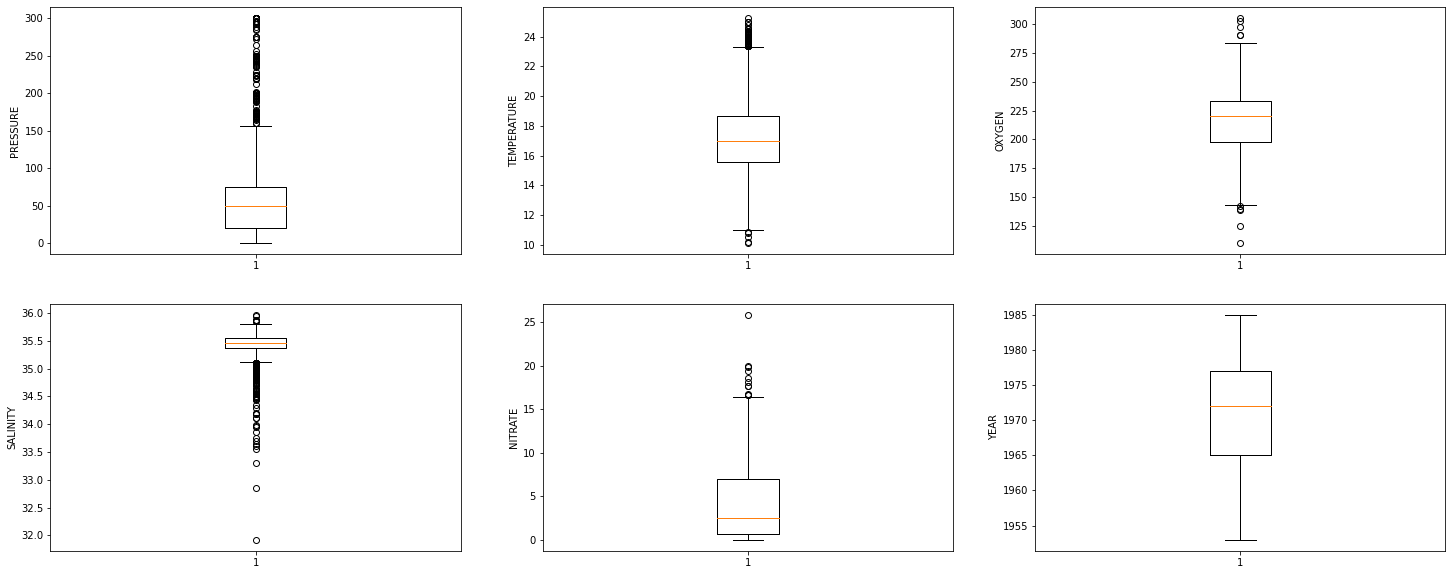

In [86]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
axs[0,0].boxplot(nitrate_wO2.PRESSURE)
axs[0,0].set_ylabel('PRESSURE')
axs[0,1].boxplot(nitrate_wO2.TEMPERATURE_VALUE)
axs[0,1].set_ylabel('TEMPERATURE')
axs[1,0].boxplot(nitrate_wO2.SALINITY_VALUE)
axs[1,0].set_ylabel('SALINITY')
axs[1,1].boxplot(nitrate_wO2.NITRATE_VALUE)
axs[1,1].set_ylabel('NITRATE')
axs[0,2].boxplot(nitrate_wO2.OXYGEN_VALUE)
axs[0,2].set_ylabel('OXYGEN')
axs[1,2].boxplot(nitrate_wO2.Year)
axs[1,2].set_ylabel('YEAR')

Text(0, 0.5, 'YEAR')

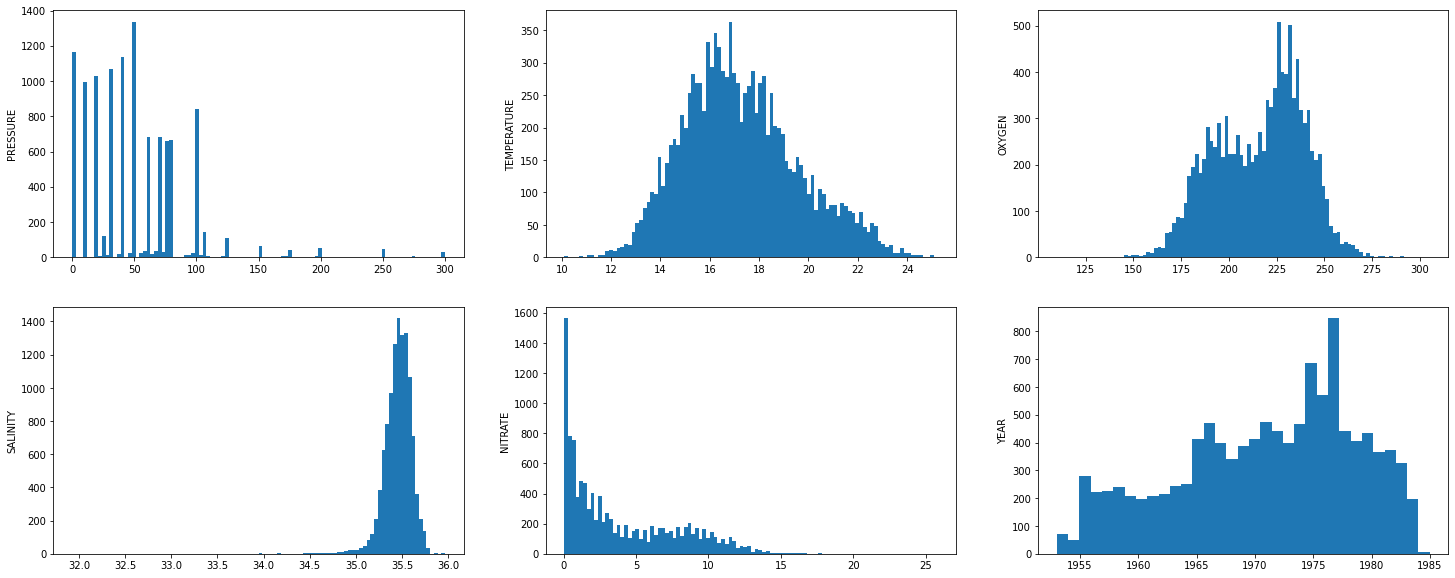

In [87]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
axs[0,0].hist(nitrate_wO2.PRESSURE, bins=100)
axs[0,0].set_ylabel('PRESSURE')
axs[0,1].hist(nitrate_wO2.TEMPERATURE_VALUE, bins=100)
axs[0,1].set_ylabel('TEMPERATURE')
axs[1,0].hist(nitrate_wO2.SALINITY_VALUE, bins=100)
axs[1,0].set_ylabel('SALINITY')
axs[1,1].hist(nitrate_wO2.NITRATE_VALUE, bins=100)
axs[1,1].set_ylabel('NITRATE')
axs[0,2].hist(nitrate_wO2.OXYGEN_VALUE, bins=100)
axs[0,2].set_ylabel('OXYGEN')
axs[1,2].hist(nitrate_wO2.Year, bins=np.max(nitrate_wO2.Year) - np.min(nitrate_wO2.Year) + 1)
axs[1,2].set_ylabel('YEAR')

In [26]:
# Remove outliers
# nitrate = nitrate.iloc[np.where((nitrate.NITRATE_VALUE > 1) & (nitrate.NITRATE_VALUE < 24))]
nitrate = nitrate.iloc[np.where((nitrate.NITRATE_VALUE < 24))]
nitrate = nitrate.iloc[np.where((nitrate.SALINITY_VALUE > 35) & (nitrate.SALINITY_VALUE < 35.8))]
nitrate = nitrate.iloc[np.where(nitrate.PRESSURE < 120)]
nitrate_wO2 = nitrate_wO2.iloc[np.where((nitrate_wO2.NITRATE_VALUE < 24))]
nitrate_wO2 = nitrate_wO2.iloc[np.where((nitrate_wO2.SALINITY_VALUE > 35) & (nitrate_wO2.SALINITY_VALUE < 35.8))]
nitrate_wO2 = nitrate_wO2.iloc[np.where(nitrate_wO2.PRESSURE < 120)]
nitrate_1985 = nitrate_1985.iloc[np.where((nitrate_1985.NITRATE_VALUE < 24))]
nitrate_1985 = nitrate_1985.iloc[np.where((nitrate_1985.SALINITY_VALUE > 35) & (nitrate_1985.SALINITY_VALUE < 35.8))]
nitrate_1985 = nitrate_1985.iloc[np.where(nitrate_1985.PRESSURE < 120)]
nitrate.shape, nitrate_wO2.shape, nitrate_1985.shape

((12606, 10), (10695, 12), (11438, 10))

In [185]:
nitrate_deep = nitrate[(nitrate.PRESSURE > 80) & (nitrate.PRESSURE < 120)]
nitrate_deep.head(), nitrate_deep.shape

(    Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 7   1953   151     0     100.0               16.2                  0.0   
 15  1953   160     0     100.0               16.8                  0.0   
 23  1953   169     0     100.0               16.4                  0.0   
 31  1953   180     0     100.0               16.2                  0.0   
 47  1953   195     0     100.0               15.2                  0.0   
 
     SALINITY_VALUE  SALINITY_QC_FLAG  NITRATE_VALUE  NITRATE_QC_FLAG  
 7           35.570               0.0            6.7              0.0  
 15          35.407               0.0            2.8              0.0  
 23          35.444               0.0            2.2              0.0  
 31          35.498               0.0            2.4              0.0  
 47          35.462               0.0           10.6              0.0  ,
 (1325, 10))

(array([ 8., 20., 16., 21., 28., 20., 22., 27., 28., 21., 31., 31., 34.,
        26., 21., 21., 47., 24., 35., 48., 42., 37., 47., 53., 43., 67.,
        48., 44., 56., 54., 31., 37., 33., 28., 34., 29., 17., 32., 10.,
        13., 10.,  6.,  5.,  4.,  2.,  3.,  4.,  2.,  2.,  3.]),
 array([ 0.06  ,  0.3928,  0.7256,  1.0584,  1.3912,  1.724 ,  2.0568,
         2.3896,  2.7224,  3.0552,  3.388 ,  3.7208,  4.0536,  4.3864,
         4.7192,  5.052 ,  5.3848,  5.7176,  6.0504,  6.3832,  6.716 ,
         7.0488,  7.3816,  7.7144,  8.0472,  8.38  ,  8.7128,  9.0456,
         9.3784,  9.7112, 10.044 , 10.3768, 10.7096, 11.0424, 11.3752,
        11.708 , 12.0408, 12.3736, 12.7064, 13.0392, 13.372 , 13.7048,
        14.0376, 14.3704, 14.7032, 15.036 , 15.3688, 15.7016, 16.0344,
        16.3672, 16.7   ]),
 <a list of 50 Patch objects>)

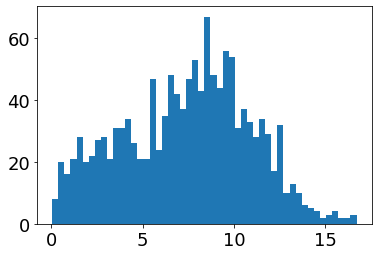

In [186]:
plt.hist(nitrate_deep.NITRATE_VALUE, bins=50)

In [187]:
len(nitrate_deep[nitrate.NITRATE_VALUE < 1])/len(nitrate_deep) # around 3%

/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.028679245283018868

Text(0, 0.5, 'YEAR')

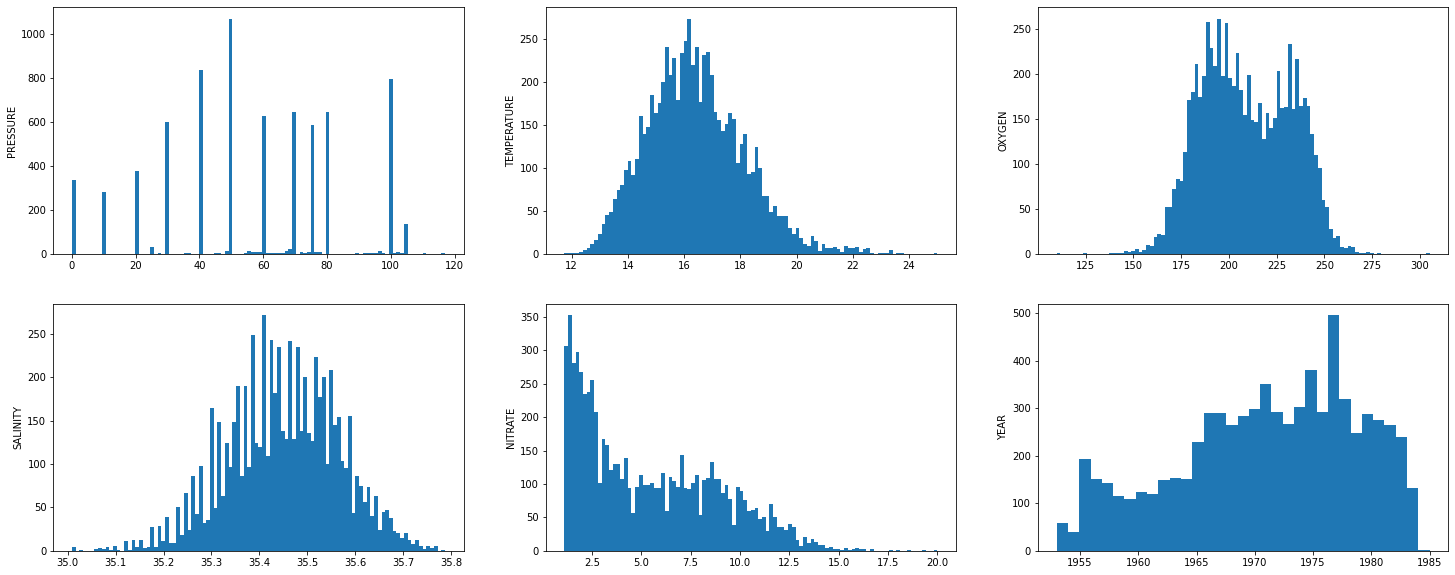

In [89]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
axs[0,0].hist(nitrate_wO2.PRESSURE, bins=100)
axs[0,0].set_ylabel('PRESSURE')
axs[0,1].hist(nitrate_wO2.TEMPERATURE_VALUE, bins=100)
axs[0,1].set_ylabel('TEMPERATURE')
axs[1,0].hist(nitrate_wO2.SALINITY_VALUE, bins=100)
axs[1,0].set_ylabel('SALINITY')
axs[1,1].hist(nitrate_wO2.NITRATE_VALUE, bins=100)
axs[1,1].set_ylabel('NITRATE')
axs[0,2].hist(nitrate_wO2.OXYGEN_VALUE, bins=100)
axs[0,2].set_ylabel('OXYGEN')
axs[1,2].hist(nitrate_wO2.Year, bins=np.max(nitrate_wO2.Year) - np.min(nitrate_wO2.Year) + 1)
axs[1,2].set_ylabel('YEAR')

In [9]:
nitrite = rawdat.drop(columns=['NITRATE_VALUE','NITRATE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrite.dropna(inplace=True)
nitrite = nitrite[(nitrite.NITRITE_QC_FLAG == 0.0) & (nitrite.TEMPERATURE_QC_FLAG == 0.0) & (nitrite.SALINITY_QC_FLAG == 0.0)]
nitrite.head(), nitrite.shape

(Empty DataFrame
 Columns: [Year, Yday, Hour, PRESSURE, TEMPERATURE_VALUE, TEMPERATURE_QC_FLAG, SALINITY_VALUE, SALINITY_QC_FLAG, NITRITE_VALUE, NITRITE_QC_FLAG]
 Index: [], (0, 10))

In [11]:
oxygen = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','NITRATE_VALUE','NITRATE_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
oxygen.dropna(inplace=True)
oxygen = oxygen[(oxygen.OXYGEN_QC_FLAG == 0.0) & (oxygen.TEMPERATURE_QC_FLAG == 0.0) & (oxygen.SALINITY_QC_FLAG == 0.0)]
oxygen.head(), oxygen.shape

(   Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 0  1953   151     0       0.0               18.6                  0.0   
 1  1953   151     0      10.0               18.6                  0.0   
 2  1953   151     0      20.0               18.7                  0.0   
 3  1953   151     0      30.0               18.8                  0.0   
 4  1953   151     0      40.0               18.8                  0.0   
 
    SALINITY_VALUE  SALINITY_QC_FLAG  OXYGEN_VALUE  OXYGEN_QC_FLAG  
 0          35.444               0.0        240.79             0.0  
 1          35.371               0.0        242.13             0.0  
 2          35.462               0.0        248.38             0.0  
 3          35.462               0.0        238.55             0.0  
 4          35.444               0.0        232.30             0.0  ,
 (12970, 10))

In [10]:
cols = ['Year', 'Yday', 'Hour', 'PRESSURE', 'TEMPERATURE_VALUE', 'SALINITY_VALUE', 'OXYGEN_VALUE']
oxygen[cols].apply(whiskers, whis=1.75)

Year                                       (1941.25, 1999.75)
Yday                                        (-228.25, 595.25)
Hour                                               (0.0, 0.0)
PRESSURE                                       (-67.5, 157.5)
TEMPERATURE_VALUE    (10.000437499999999, 24.808812500000002)
SALINITY_VALUE       (35.081499999999984, 35.864500000000014)
OXYGEN_VALUE                   (137.9325, 296.73749999999995)
dtype: object

Text(0, 0.5, 'YEAR')

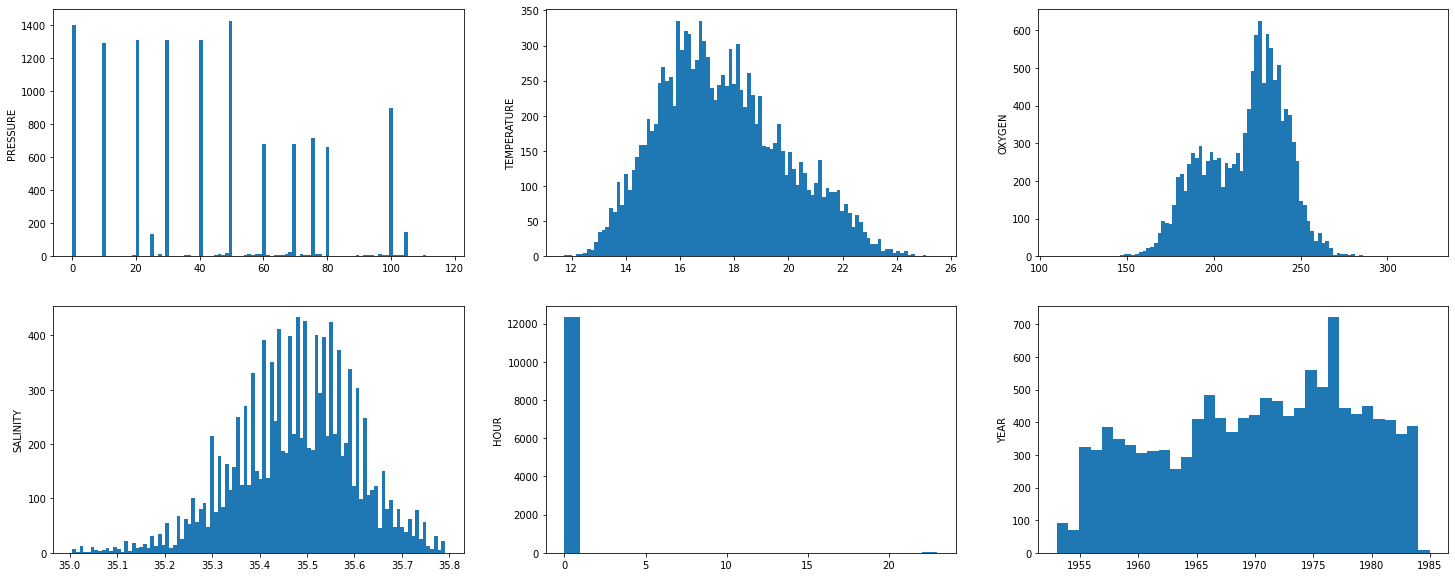

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
axs[0,0].hist(oxygen.PRESSURE, bins=100)
axs[0,0].set_ylabel('PRESSURE')
axs[0,1].hist(oxygen.TEMPERATURE_VALUE, bins=100)
axs[0,1].set_ylabel('TEMPERATURE')
axs[1,0].hist(oxygen.SALINITY_VALUE, bins=100)
axs[1,0].set_ylabel('SALINITY')
axs[1,1].hist(oxygen.Hour, bins=24)
axs[1,1].set_ylabel('HOUR')
axs[0,2].hist(oxygen.OXYGEN_VALUE, bins=100)
axs[0,2].set_ylabel('OXYGEN')
axs[1,2].hist(oxygen.Year, bins=np.max(oxygen.Year) - np.min(oxygen.Year) + 1)
axs[1,2].set_ylabel('YEAR')

In [12]:
#Remove outliers
oxygen = oxygen.iloc[np.where((oxygen.SALINITY_VALUE > 35) & (oxygen.SALINITY_VALUE < 35.8))]
oxygen = oxygen.iloc[np.where(oxygen.PRESSURE < 120)]

In [11]:
phosphate = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','NITRATE_VALUE','NITRATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
phosphate.dropna(inplace=True)
phosphate = phosphate[(phosphate.PHOSPHATE_QC_FLAG == 0.0) & (phosphate.TEMPERATURE_QC_FLAG == 0.0) & (phosphate.SALINITY_QC_FLAG == 0.0)]
phosphate.PHOSPHATE_VALUE = pd.to_numeric(phosphate.PHOSPHATE_VALUE)
phosphate.head(), phosphate.shape

(   Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 0  1953   151     0       0.0               18.6                  0.0   
 1  1953   151     0      10.0               18.6                  0.0   
 2  1953   151     0      20.0               18.7                  0.0   
 3  1953   151     0      30.0               18.8                  0.0   
 4  1953   151     0      40.0               18.8                  0.0   
 
    SALINITY_VALUE  SALINITY_QC_FLAG  PHOSPHATE_VALUE  PHOSPHATE_QC_FLAG  
 0          35.444               0.0             0.26                0.0  
 1          35.371               0.0             0.26                0.0  
 2          35.462               0.0             0.29                0.0  
 3          35.462               0.0             0.26                0.0  
 4          35.444               0.0             0.29                0.0  ,
 (13442, 10))

In [15]:
phosphate_wO2 = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','NITRATE_VALUE','NITRATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
phosphate_wO2.dropna(inplace=True)
phosphate_wO2 = phosphate_wO2[(phosphate_wO2.PHOSPHATE_QC_FLAG == 0.0) & (phosphate_wO2.TEMPERATURE_QC_FLAG == 0.0) & (phosphate_wO2.SALINITY_QC_FLAG == 0.0) & (phosphate_wO2.OXYGEN_QC_FLAG == 0.0)]
phosphate_wO2.PHOSPHATE_VALUE = pd.to_numeric(phosphate_wO2.PHOSPHATE_VALUE)
phosphate_wO2.head(), phosphate_wO2.shape

(   Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 0  1953   151     0       0.0               18.6                  0.0   
 1  1953   151     0      10.0               18.6                  0.0   
 2  1953   151     0      20.0               18.7                  0.0   
 3  1953   151     0      30.0               18.8                  0.0   
 4  1953   151     0      40.0               18.8                  0.0   
 
    SALINITY_VALUE  SALINITY_QC_FLAG  OXYGEN_VALUE  OXYGEN_QC_FLAG  \
 0          35.444               0.0        240.79             0.0   
 1          35.371               0.0        242.13             0.0   
 2          35.462               0.0        248.38             0.0   
 3          35.462               0.0        238.55             0.0   
 4          35.444               0.0        232.30             0.0   
 
    PHOSPHATE_VALUE  PHOSPHATE_QC_FLAG  
 0             0.26                0.0  
 1             0.26                0.0  
 2       

In [12]:
silicate = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'NITRATE_VALUE','NITRATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
silicate.dropna(inplace=True)
silicate = silicate[(silicate.SILICATE_QC_FLAG == 0.0) & (silicate.TEMPERATURE_QC_FLAG == 0.0) & (silicate.SALINITY_QC_FLAG == 0.0)]
silicate.SILICATE_VALUE = pd.to_numeric(silicate.SILICATE_VALUE)
silicate.head(), silicate.shape

(      Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 5077  1968    71     0       0.0             23.582                  0.0   
 5078  1968    71     0      10.0             23.399                  0.0   
 5079  1968    71     0      20.0             23.105                  0.0   
 5080  1968    71     0      30.0             22.627                  0.0   
 5081  1968    71     0      40.0             20.788                  0.0   
 
       SALINITY_VALUE  SALINITY_QC_FLAG  SILICATE_VALUE  SILICATE_QC_FLAG  
 5077          35.548               0.0             0.6               0.0  
 5078          35.539               0.0             0.5               0.0  
 5079          35.505               0.0             0.4               0.0  
 5080          35.517               0.0             0.5               0.0  
 5081          35.497               0.0             1.7               0.0  ,
 (8350, 10))

In [21]:
silicate_wO2 = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'NITRATE_VALUE','NITRATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
silicate_wO2.dropna(inplace=True)
silicate_wO2 = silicate_wO2[(silicate_wO2.SILICATE_QC_FLAG == 0.0) & (silicate_wO2.TEMPERATURE_QC_FLAG == 0.0) & (silicate_wO2.SALINITY_QC_FLAG == 0.0) & (silicate_wO2.OXYGEN_QC_FLAG == 0.0)]
silicate_wO2.SILICATE_VALUE = pd.to_numeric(silicate_wO2.SILICATE_VALUE)
silicate_wO2.head(), silicate_wO2.shape

(      Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 5077  1968    71     0       0.0             23.582                  0.0   
 5078  1968    71     0      10.0             23.399                  0.0   
 5079  1968    71     0      20.0             23.105                  0.0   
 5080  1968    71     0      30.0             22.627                  0.0   
 5081  1968    71     0      40.0             20.788                  0.0   
 
       SALINITY_VALUE  SALINITY_QC_FLAG  OXYGEN_VALUE  OXYGEN_QC_FLAG  \
 5077          35.548               0.0        215.32             0.0   
 5078          35.539               0.0        214.43             0.0   
 5079          35.505               0.0        216.22             0.0   
 5080          35.517               0.0        210.41             0.0   
 5081          35.497               0.0        198.79             0.0   
 
       SILICATE_VALUE  SILICATE_QC_FLAG  
 5077             0.6               0.0  
 5078       

In [13]:
ammonia = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','NITRATE_VALUE','NITRATE_QC_FLAG'])
ammonia.dropna(inplace=True)
ammonia = ammonia[(ammonia.AMMONIA_QC_FLAG == 0.0) & (ammonia.TEMPERATURE_QC_FLAG == 0.0) & (ammonia.SALINITY_QC_FLAG == 0.0)]
ammonia.head(), ammonia.shape

(Empty DataFrame
 Columns: [Year, Yday, Hour, PRESSURE, TEMPERATURE_VALUE, TEMPERATURE_QC_FLAG, SALINITY_VALUE, SALINITY_QC_FLAG, AMMONIA_VALUE, AMMONIA_QC_FLAG]
 Index: [], (0, 10))

## relative distribution of variables

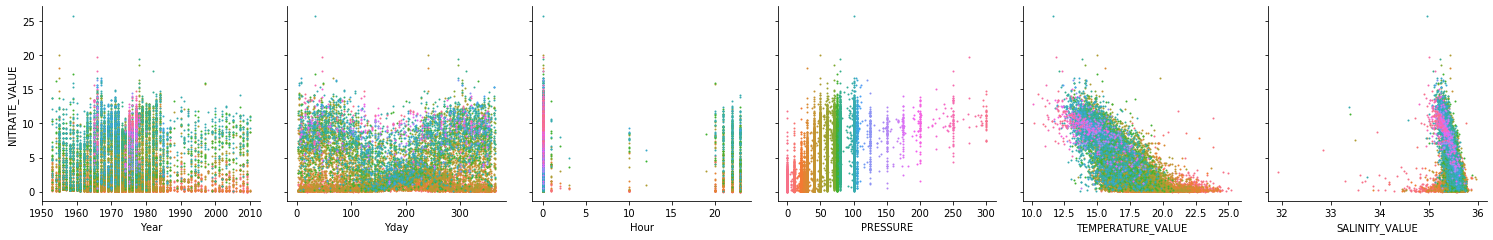

In [14]:
p = sns.PairGrid(data=nitrate, y_vars="NITRATE_VALUE", x_vars=["Year","Yday","Hour","PRESSURE","TEMPERATURE_VALUE","SALINITY_VALUE"], height=3.5, hue="PRESSURE")
p.map(plt.scatter, s=1)

In [22]:
from matplotlib import rcParams 
rcParams.update({'font.size': 18})

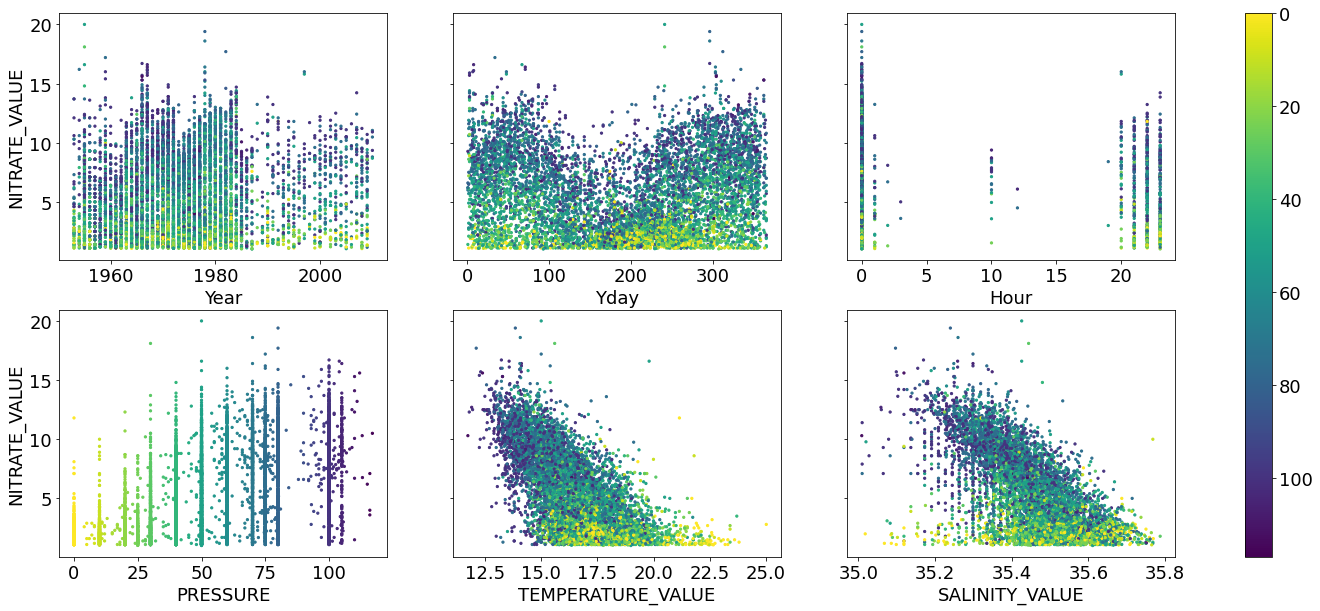

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,10))
for ax, xcol in zip(axes.flat, [0,1,2,3,4,6]):
    sc = ax.scatter(x=nitrate[nitrate.columns[xcol]], y=nitrate[nitrate.columns[-2]], c=nitrate.PRESSURE, s=5, cmap=plt.get_cmap("viridis_r"))
    ax.set_xlabel(nitrate.columns[xcol])
    if xcol in [0,3]: ax.set_ylabel(nitrate.columns[-2])
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.invert_yaxis()

In [10]:
nitrate = nitrate.iloc[np.where((nitrate.NITRATE_VALUE > 1) & (nitrate.NITRATE_VALUE < 24))]
nitrate = nitrate.iloc[np.where((nitrate.SALINITY_VALUE > 35) & (nitrate.SALINITY_VALUE < 35.8))]
nitrate = nitrate.iloc[np.where(nitrate.PRESSURE < 120)]

In [11]:
nitrate_deep  = nitrate.copy()
nitrate_deep = nitrate_deep.iloc[np.where(nitrate.PRESSURE > 80)]

In [12]:
len(nitrate), len(nitrate_deep)

(8633, 1281)

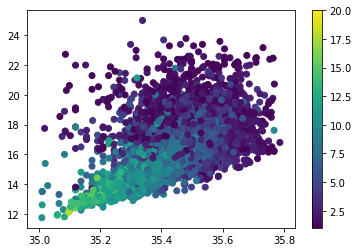

In [11]:
plt.scatter(nitrate.SALINITY_VALUE, nitrate.TEMPERATURE_VALUE, c = nitrate.NITRATE_VALUE)
plt.colorbar()

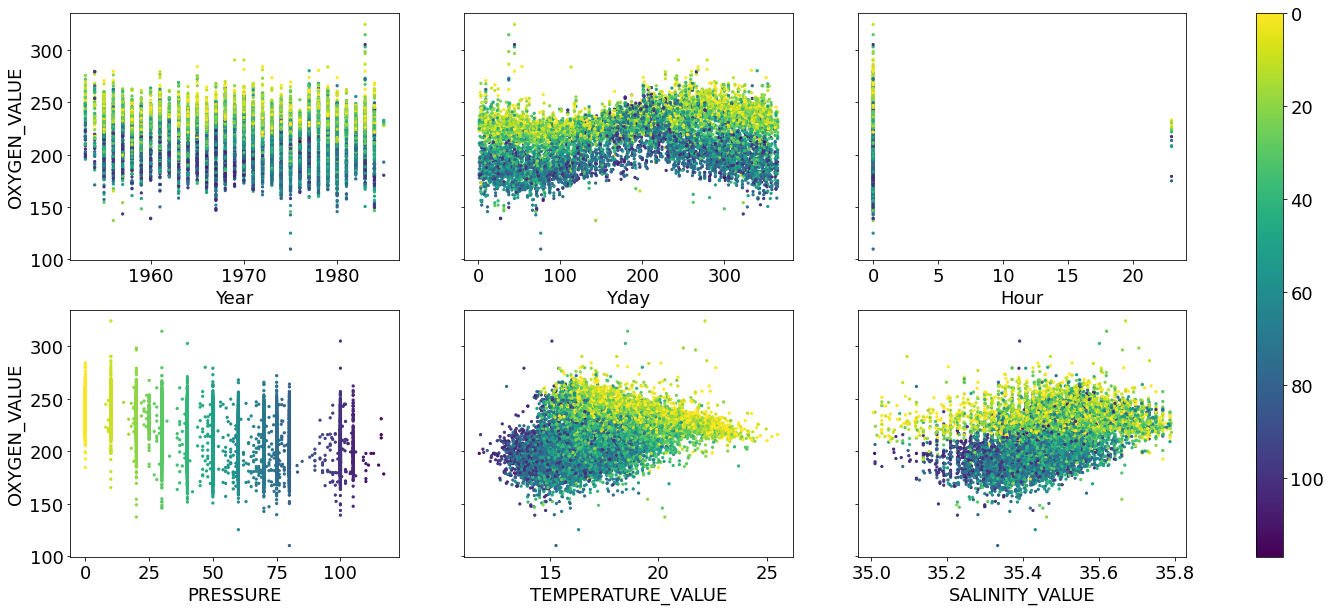

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,10))
for ax, xcol in zip(axes.flat, [0,1,2,3,4,6]):
    sc = ax.scatter(x=oxygen[oxygen.columns[xcol]], y=oxygen[oxygen.columns[-2]], c=oxygen.PRESSURE, s=5, cmap=plt.get_cmap("viridis_r"))
    ax.set_xlabel(oxygen.columns[xcol])
    if xcol in [0,3]: ax.set_ylabel(oxygen.columns[-2])
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.invert_yaxis()

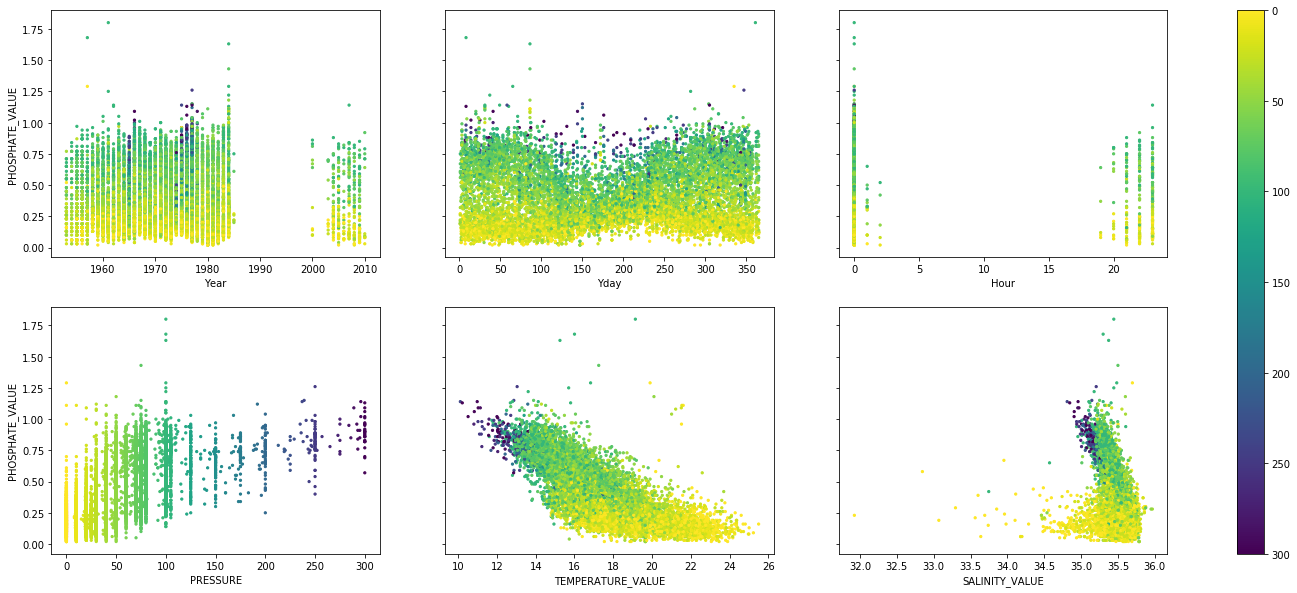

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,10))
for ax, xcol in zip(axes.flat, [0,1,2,3,4,6]):
    sc = ax.scatter(x=phosphate[phosphate.columns[xcol]], y=phosphate[phosphate.columns[-2]], c=phosphate.PRESSURE, s=5, cmap=plt.get_cmap("viridis_r"))
    ax.set_xlabel(phosphate.columns[xcol])
    if xcol in [0,3]: ax.set_ylabel(phosphate.columns[-2])
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.invert_yaxis()

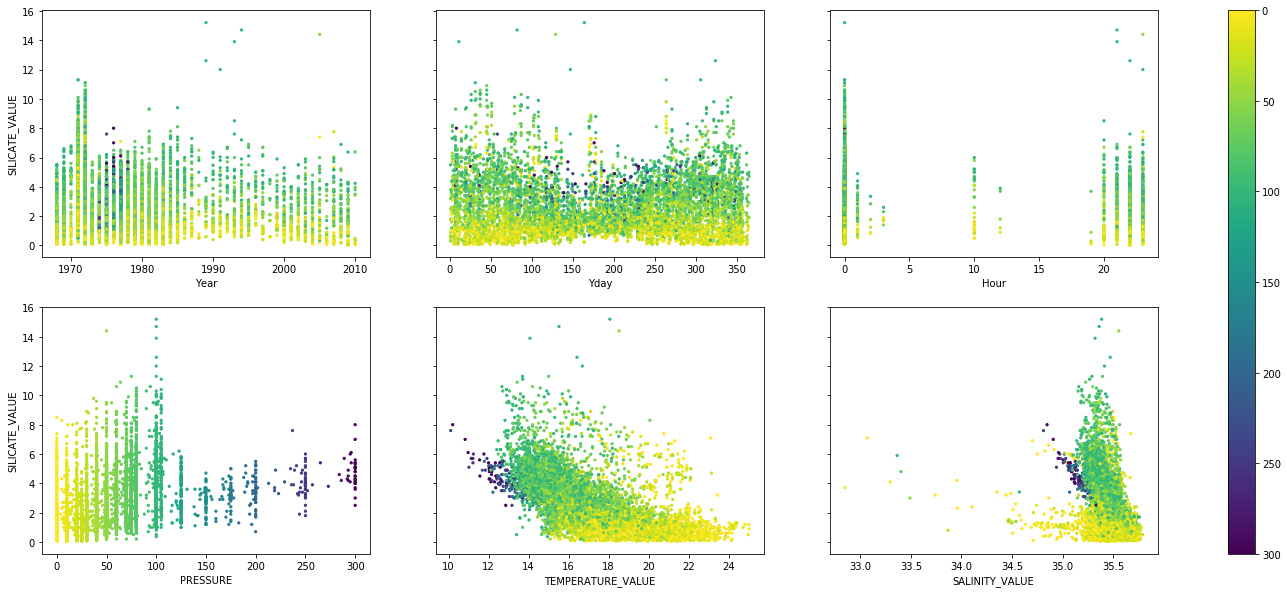

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,10))
for ax, xcol in zip(axes.flat, [0,1,2,3,4,6]):
    sc = ax.scatter(x=silicate[silicate.columns[xcol]], y=silicate[silicate.columns[-2]], c=silicate.PRESSURE, s=5, cmap=plt.get_cmap("viridis_r"))
    ax.set_xlabel(silicate.columns[xcol])
    if xcol in [0,3]: ax.set_ylabel(silicate.columns[-2])
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.invert_yaxis()

## Standardisation

In [40]:
nitrate.dtypes

Year                     int64
Yday                     int64
Hour                     int64
PRESSURE               float64
TEMPERATURE_VALUE      float64
TEMPERATURE_QC_FLAG    float64
SALINITY_VALUE         float64
SALINITY_QC_FLAG       float64
NITRATE_VALUE          float64
NITRATE_QC_FLAG        float64
dtype: object

In [27]:
stats = nitrate.describe()
stats['NITRATE_VALUE']['mean'] = 0
stats['NITRATE_VALUE']['std'] = 1
stats = stats.transpose()
nitrate_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,12606.0,1973.574488,11.034516,1953.000000,1966.000000,1973.000000,1979.000000,2010.000000
Yday,12606.0,3.214067,1.772996,0.017214,1.704206,3.305128,4.699478,6.283185
Hour,12606.0,1.631128,5.724349,0.000000,0.000000,0.000000,0.000000,23.000000
PRESSURE,12606.0,45.228740,30.717783,0.000000,20.000000,40.000000,70.000000,117.000000
TEMPERATURE_VALUE,12606.0,17.334803,2.231818,11.740000,15.700000,17.022000,18.708250,25.230000
TEMPERATURE_QC_FLAG,12606.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SALINITY_VALUE,12606.0,35.471884,0.122632,35.005000,35.390000,35.480000,35.557000,35.791000
SALINITY_QC_FLAG,12606.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NITRATE_VALUE,12606.0,0.000000,1.000000,0.020000,0.700000,2.400000,6.600000,20.000000
NITRATE_QC_FLAG,12606.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
nitrate = (nitrate - stats['mean'])/stats['std']
nitrate.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','NITRATE_QC_FLAG'], inplace=True)
nitrate.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
count,1.260600e+04,1.260600e+04,12606.000000,1.260600e+04,1.260600e+04,1.260600e+04,12606.00000
mean,-8.585584e-15,2.198252e-16,0.000000,-4.960159e-17,7.214776e-16,-3.158268e-14,3.82849
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.65113
min,-1.864557e+00,-1.803079e+00,-0.284946,-1.472396e+00,-2.506836e+00,-3.807207e+00,0.02000
25%,-6.864360e-01,-8.515868e-01,-0.284946,-8.213073e-01,-7.324980e-01,-6.677203e-01,0.70000
50%,-5.206285e-02,5.135982e-02,-0.284946,-1.702187e-01,-1.401559e-01,6.618571e-02,2.40000
75%,4.916855e-01,8.377972e-01,-0.284946,8.064143e-01,6.153939e-01,6.940831e-01,6.60000
max,3.301052e+00,1.731035e+00,3.732979,2.336473e+00,3.537563e+00,2.602239e+00,20.00000


In [140]:
stats = nitrate_wO2.describe()
stats['NITRATE_VALUE']['mean'] = 0
stats['NITRATE_VALUE']['std'] = 1
stats = stats.transpose()
nitrate_stats_wO2 = stats
stats.index, nitrate_wO2.keys()

(Index(['Year', 'Yday', 'Hour', 'PRESSURE', 'TEMPERATURE_VALUE',
        'TEMPERATURE_QC_FLAG', 'SALINITY_VALUE', 'SALINITY_QC_FLAG',
        'NITRATE_VALUE', 'NITRATE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG'],
       dtype='object'),
 Index(['Year', 'Yday', 'Hour', 'PRESSURE', 'TEMPERATURE_VALUE',
        'TEMPERATURE_QC_FLAG', 'SALINITY_VALUE', 'SALINITY_QC_FLAG',
        'NITRATE_VALUE', 'NITRATE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG'],
       dtype='object'))

In [141]:
nitrate_wO2 = (nitrate_wO2 - stats['mean'])/stats['std']
nitrate_wO2.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','NITRATE_QC_FLAG','OXYGEN_QC_FLAG'], inplace=True)
nitrate_wO2.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE,OXYGEN_VALUE
count,1.069500e+04,1.069500e+04,1.069500e+04,1.069500e+04,1.069500e+04,1.069500e+04,10695.000000,1.069500e+04
mean,-3.316530e-15,-2.391729e-17,-1.062991e-17,-8.503924e-17,-5.235228e-16,4.156293e-14,3.837916,2.358510e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.688076,1.000000e+00
min,-2.235669e+00,-1.784333e+00,-2.369118e-02,-1.506993e+00,-2.490879e+00,-3.751940e+00,0.060000,-4.569643e+00
25%,-7.409758e-01,-8.668998e-01,-2.369118e-02,-8.447875e-01,-7.313562e-01,-6.555649e-01,0.700000,-8.211507e-01
50%,1.309283e-01,5.053344e-02,-2.369118e-02,-1.825818e-01,-1.300004e-01,7.014811e-02,2.400000,1.927191e-01
75%,7.537169e-01,8.520804e-01,-2.369118e-02,8.107268e-01,6.183535e-01,6.910359e-01,6.500000,7.664461e-01
max,1.750179e+00,1.730885e+00,4.220585e+01,2.366910e+00,3.518225e+00,2.585953e+00,20.000000,3.788789e+00


In [142]:
stats = nitrate_1985.describe()
stats['NITRATE_VALUE']['mean'] = 0
stats['NITRATE_VALUE']['std'] = 1
stats = stats.transpose()
nitrate_stats_1985 = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,11438.0,1971.108411,7.953434,1953.000,1966.000,1972.000,1977.000,1985.000
Yday,11438.0,186.848050,103.335802,1.000,98.000,193.000,276.000,365.000
Hour,11438.0,0.058577,1.156797,0.000,0.000,0.000,0.000,23.000
PRESSURE,11438.0,45.119960,30.201936,0.000,20.000,40.000,70.000,117.000
TEMPERATURE_VALUE,11438.0,17.308887,2.230521,11.740,15.690,17.000,18.670,25.230
TEMPERATURE_QC_FLAG,11438.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
SALINITY_VALUE,11438.0,35.469705,0.122605,35.005,35.389,35.478,35.553,35.791
SALINITY_QC_FLAG,11438.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
NITRATE_VALUE,11438.0,0.000000,1.000000,0.060,0.700,2.400,6.500,20.000
NITRATE_QC_FLAG,11438.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [143]:
nitrate_1985 = (nitrate_1985 - stats['mean'])/stats['std']
nitrate_1985.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','NITRATE_QC_FLAG'], inplace=True)
nitrate_1985.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
count,1.143800e+04,1.143800e+04,1.143800e+04,1.143800e+04,1.143800e+04,1.143800e+04,11438.000000
mean,-4.413093e-15,-1.192728e-16,1.490910e-17,1.490910e-17,8.075761e-16,1.158934e-14,3.807454
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.656478
min,-2.276804e+00,-1.798487e+00,-5.063696e-02,-1.493943e+00,-2.496675e+00,-3.790259e+00,0.060000
25%,-6.422899e-01,-8.597993e-01,-5.063696e-02,-8.317334e-01,-7.257886e-01,-6.582529e-01,0.700000
50%,1.121012e-01,5.953357e-02,-5.063696e-02,-1.695242e-01,-1.384819e-01,6.765464e-02,2.400000
75%,7.407605e-01,8.627402e-01,-5.063696e-02,8.237896e-01,6.102220e-01,6.793745e-01,6.500000
max,1.746615e+00,1.724010e+00,1.983185e+01,2.379981e+00,3.551239e+00,2.620565e+00,20.000000


In [188]:
stats = nitrate_deep.describe()
stats['NITRATE_VALUE']['mean'] = 0
stats['NITRATE_VALUE']['std'] = 1
stats = stats.transpose()
nitrate_deep_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,1325.0,1972.226415,13.447618,1953.000,1963.000,1969.000,1977.000,2010.000
Yday,1325.0,186.899623,105.898885,1.000,95.000,188.000,281.000,365.000
Hour,1325.0,2.835472,7.324592,0.000,0.000,0.000,0.000,23.000
PRESSURE,1325.0,100.509811,2.788481,80.200,100.000,100.000,100.000,117.000
TEMPERATURE_VALUE,1325.0,15.202309,1.530686,11.740,14.000,14.970,16.200,20.060
TEMPERATURE_QC_FLAG,1325.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
SALINITY_VALUE,1325.0,35.387451,0.123774,35.009,35.299,35.386,35.471,35.751
SALINITY_QC_FLAG,1325.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
NITRATE_VALUE,1325.0,0.000000,1.000000,0.060,4.700,7.800,9.900,16.700
NITRATE_QC_FLAG,1325.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [189]:
nitrate_deep = (nitrate_deep - stats['mean'])/stats['std']
nitrate_deep.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','NITRATE_QC_FLAG'], inplace=True)
nitrate_deep.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
count,1.325000e+03,1.325000e+03,1.325000e+03,1.325000e+03,1.325000e+03,1.325000e+03,1325.000000
mean,-5.662892e-15,-3.217552e-17,-6.435104e-17,-1.598051e-15,-8.767829e-16,-3.072762e-14,7.411396
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.505133
min,-1.429726e+00,-1.755445e+00,-3.871167e-01,-7.283467e+00,-2.261932e+00,-3.057609e+00,0.060000
25%,-6.861003e-01,-8.678054e-01,-3.871167e-01,-1.828276e-01,-7.854703e-01,-7.146219e-01,4.700000
50%,-2.399247e-01,1.039083e-02,-3.871167e-01,-1.828276e-01,-1.517677e-01,-1.172561e-02,7.800000
75%,3.549762e-01,8.885870e-01,-3.871167e-01,-1.828276e-01,6.517935e-01,6.750121e-01,9.900000
max,2.808942e+00,1.681797e+00,2.752990e+00,5.913681e+00,3.173538e+00,2.937207e+00,16.700000


In [43]:
nitrate.head()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
3,-1.881004,-0.384206,-0.289688,-0.925460,1.377390,0.080347,1.2
6,-1.881004,-0.384206,-0.289688,0.658693,0.390671,0.236877,3.1
7,-1.881004,-0.384206,-0.289688,1.538778,-0.131710,1.019528,6.7
12,-1.881004,-0.295072,-0.289688,-0.573426,0.913052,0.080347,1.4
14,-1.881004,-0.295072,-0.289688,0.658693,0.855009,-0.076183,1.4


In [14]:
stats = oxygen.describe()
stats['OXYGEN_VALUE']['mean'] = 0
stats['OXYGEN_VALUE']['std'] = 1
stats = stats.transpose()
oxygen_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,12341.0,1970.307187,8.502771,1953.000,1964.000,1971.000,1977.000,1985.000
Yday,12341.0,184.713637,104.733730,1.000,95.000,188.000,276.000,365.000
Hour,12341.0,0.029819,0.827653,0.000,0.000,0.000,0.000,23.000
PRESSURE,12341.0,42.985674,30.229482,0.000,20.000,40.000,70.000,117.000
TEMPERATURE_VALUE,12341.0,17.570331,2.317399,11.740,15.870,17.320,19.070,25.500
TEMPERATURE_QC_FLAG,12341.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
SALINITY_VALUE,12341.0,35.476970,0.125817,35.005,35.394,35.482,35.565,35.791
SALINITY_QC_FLAG,12341.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
OXYGEN_VALUE,12341.0,0.000000,1.000000,109.900,200.130,223.360,235.430,324.320
OXYGEN_QC_FLAG,12341.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [15]:
oxygen = (oxygen - stats['mean'])/stats['std']
oxygen.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','OXYGEN_QC_FLAG'], inplace=True)
oxygen.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,OXYGEN_VALUE
count,1.234100e+04,1.234100e+04,12341.000000,1.234100e+04,1.234100e+04,1.234100e+04,12341.000000
mean,1.274958e-14,-8.751519e-17,0.000000,8.060610e-17,-1.520001e-16,3.435202e-14,218.501794
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,23.150133
min,-2.035476e+00,-1.754102e+00,-0.036029,-1.421978e+00,-2.515894e+00,-3.751239e+00,109.900000
25%,-7.417802e-01,-8.565878e-01,-0.036029,-7.603727e-01,-7.337237e-01,-6.594490e-01,200.130000
50%,8.148080e-02,3.137826e-02,-0.036029,-9.876695e-02,-1.080223e-01,3.997917e-02,223.360000
75%,7.871331e-01,8.716042e-01,-0.036029,8.936417e-01,6.471345e-01,6.996671e-01,235.430000
max,1.728003e+00,1.721378e+00,27.753380,2.448415e+00,3.421796e+00,2.495926e+00,324.320000


In [23]:
stats = phosphate.describe()
stats['PHOSPHATE_VALUE']['mean'] = 0
stats['PHOSPHATE_VALUE']['std'] = 1
stats = stats.transpose()
phosphate_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,13442.0,1971.338194,10.073765,1953.000,1964.000,1972.00,1977.000,2010.000
Yday,13442.0,183.453802,105.142586,1.000,91.000,187.00,275.000,365.000
Hour,13442.0,0.506472,3.303441,0.000,0.000,0.00,0.000,23.000
PRESSURE,13442.0,47.409924,40.729996,0.000,20.000,40.00,70.000,300.000
TEMPERATURE_VALUE,13442.0,17.503478,2.409211,10.110,15.760,17.24,19.050,25.500
TEMPERATURE_QC_FLAG,13442.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000
SALINITY_VALUE,13442.0,35.461049,0.162961,31.924,35.387,35.48,35.557,35.967
SALINITY_QC_FLAG,13442.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000
PHOSPHATE_VALUE,13442.0,0.000000,1.000000,0.020,0.210,0.33,0.570,1.800
PHOSPHATE_QC_FLAG,13442.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000


In [63]:
phosphate.PHOSPHATE_VALUE = pd.to_numeric(phosphate.PHOSPHATE_VALUE)
phosphate = (phosphate - stats['mean'])/stats['std']
phosphate.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','PHOSPHATE_QC_FLAG'], inplace=True)
phosphate.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,PHOSPHATE_VALUE
count,1.344200e+04,1.344200e+04,1.344200e+04,1.344200e+04,1.344200e+04,1.344200e+04,13442.000000
mean,-5.751157e-15,1.289781e-16,3.383033e-17,1.310925e-16,6.512339e-16,1.483460e-14,0.393668
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.229132
min,-1.820391e+00,-1.735299e+00,-1.533166e-01,-1.164005e+00,-3.068838e+00,-2.170491e+01,0.020000
25%,-7.284460e-01,-8.793183e-01,-1.533166e-01,-6.729665e-01,-7.236718e-01,-4.543995e-01,0.210000
50%,6.569602e-02,3.372752e-02,-1.533166e-01,-1.819279e-01,-1.093627e-01,1.162898e-01,0.330000
75%,5.620348e-01,8.706862e-01,-1.533166e-01,5.546300e-01,6.419206e-01,5.887960e-01,0.570000
max,3.837871e+00,1.726667e+00,6.809120e+00,6.201574e+00,3.319146e+00,3.104738e+00,1.800000


In [16]:
stats = phosphate_wO2.describe()
stats['PHOSPHATE_VALUE']['mean'] = 0
stats['PHOSPHATE_VALUE']['std'] = 1
stats = stats.transpose()
phosphate_wO2_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,12639.0,1970.348524,8.409746,1953.000,1964.000,1971.00,1977.000,1985.000
Yday,12639.0,184.004352,104.965639,1.000,92.000,187.00,276.000,365.000
Hour,12639.0,0.029116,0.817850,0.000,0.000,0.00,0.000,23.000
PRESSURE,12639.0,47.888298,41.216216,0.000,20.000,40.00,70.000,300.000
TEMPERATURE_VALUE,12639.0,17.487603,2.412659,10.110,15.740,17.22,19.040,25.500
TEMPERATURE_QC_FLAG,12639.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000
SALINITY_VALUE,12639.0,35.460848,0.165066,31.924,35.386,35.48,35.559,35.967
SALINITY_QC_FLAG,12639.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000
OXYGEN_VALUE,12639.0,218.027466,22.960050,109.900,199.690,222.92,234.980,324.320
OXYGEN_QC_FLAG,12639.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000


In [17]:
phosphate_wO2.PHOSPHATE_VALUE = pd.to_numeric(phosphate_wO2.PHOSPHATE_VALUE)
phosphate_wO2 = (phosphate_wO2 - stats['mean'])/stats['std']
phosphate_wO2.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','PHOSPHATE_QC_FLAG'], inplace=True)
phosphate_wO2.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE
count,1.263900e+04,1.263900e+04,1.263900e+04,1.263900e+04,1.263900e+04,1.263900e+04,1.263900e+04,0.0,12639.000000
mean,6.476345e-16,-3.148223e-17,8.994923e-18,1.439188e-16,-7.803096e-16,1.599297e-14,-7.735634e-16,NaN,0.396726
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,0.229053
min,-2.062907e+00,-1.743469e+00,-3.560094e-02,-1.161880e+00,-3.057872e+00,-2.142688e+01,-4.709374e+00,NaN,0.020000
25%,-7.549008e-01,-8.765188e-01,-3.560094e-02,-6.766341e-01,-7.243471e-01,-4.534449e-01,-7.986684e-01,NaN,0.210000
50%,7.746674e-02,2.853932e-02,-3.560094e-02,-1.913882e-01,-1.109162e-01,1.160243e-01,2.130890e-01,NaN,0.330000
75%,7.909247e-01,8.764358e-01,-3.560094e-02,5.364806e-01,6.434381e-01,5.946208e-01,7.383492e-01,NaN,0.570000
max,1.742202e+00,1.724332e+00,2.808692e+01,6.116808e+00,3.320981e+00,3.066360e+00,4.629456e+00,NaN,1.800000


In [24]:
stats = silicate.describe()
stats['SILICATE_VALUE']['mean'] = 0
stats['SILICATE_VALUE']['std'] = 1
stats = stats.transpose()
silicate_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,8350.0,1979.307904,9.470199,1968.000,1972.000,1977.0000,1982.000,2010.000
Yday,8350.0,185.811018,101.898515,1.000,98.000,192.0000,271.000,365.000
Hour,8350.0,2.891257,7.382677,0.000,0.000,0.0000,0.000,23.000
PRESSURE,8350.0,51.397449,42.625235,0.000,20.000,50.0000,75.000,300.000
TEMPERATURE_VALUE,8350.0,17.225560,2.343868,10.110,15.530,16.8975,18.620,25.010
TEMPERATURE_QC_FLAG,8350.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000
SALINITY_VALUE,8350.0,35.455550,0.156546,32.847,35.383,35.4710,35.548,35.791
SALINITY_QC_FLAG,8350.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000
SILICATE_VALUE,8350.0,0.000000,1.000000,0.030,1.100,2.0000,3.600,15.200
SILICATE_QC_FLAG,8350.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000


In [65]:
silicate.SILICATE_VALUE = pd.to_numeric(silicate.SILICATE_VALUE)
silicate = (silicate - stats['mean'])/stats['std']
silicate.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','SILICATE_QC_FLAG'], inplace=True)
silicate.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,SILICATE_VALUE
count,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8350.000000
mean,9.986742e-15,3.935641e-17,5.446076e-17,-8.722231e-17,-3.539949e-16,9.499999e-15,2.496484
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.822564
min,-1.194051e+00,-1.813677e+00,-3.916272e-01,-1.205799e+00,-3.035820e+00,-1.666316e+01,0.030000
25%,-7.716737e-01,-8.617497e-01,-3.916272e-01,-7.365930e-01,-7.234027e-01,-4.634432e-01,1.100000
50%,-2.437018e-01,6.073672e-02,-3.916272e-01,-3.278455e-02,-1.399654e-01,9.869190e-02,2.000000
75%,2.842702e-01,8.360179e-01,-3.916272e-01,5.537225e-01,5.949309e-01,5.905601e-01,3.600000
max,3.240913e+00,1.758504e+00,2.723774e+00,5.832286e+00,3.321194e+00,2.142820e+00,15.200000


In [24]:
stats = silicate_wO2.describe()
stats['SILICATE_VALUE']['mean'] = 0
stats['SILICATE_VALUE']['std'] = 1
stats = stats.transpose()
silicate_wO2_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,6303.0,-1.551177e-14,1.0,-1.832594,-0.917368,-0.002142,0.684278,2.057117
Yday,6303.0,2.705541e-17,1.0,-1.812472,-0.866137,0.050624,0.839236,1.775712
Hour,6303.0,-9.018470e-18,1.0,-0.050443,-0.050443,-0.050443,-0.050443,19.821079
PRESSURE,6303.0,4.960159e-17,1.0,-1.227812,-0.668415,-0.109017,0.338501,5.484961
TEMPERATURE_VALUE,6303.0,9.334117e-16,1.0,-3.005108,-0.710705,-0.128479,0.609008,3.420946
TEMPERATURE_QC_FLAG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SALINITY_VALUE,6303.0,1.377120e-14,1.0,-16.467858,-0.483590,0.111233,0.604809,2.161471
SALINITY_QC_FLAG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OXYGEN_VALUE,6303.0,-1.181420e-15,1.0,-4.407034,-0.843212,0.104820,0.787200,4.692212
OXYGEN_QC_FLAG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
silicate_wO2.SILICATE_VALUE = pd.to_numeric(silicate_wO2.SILICATE_VALUE)
silicate_wO2 = (silicate_wO2 - stats['mean'])/stats['std']
silicate_wO2.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','SILICATE_QC_FLAG','OXYGEN_QC_FLAG'], inplace=True)
silicate_wO2.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,OXYGEN_VALUE,SILICATE_VALUE
count,6.303000e+03,6.303000e+03,6.303000e+03,6.303000e+03,6.303000e+03,6.303000e+03,6.303000e+03,6303.000000
mean,1.558392e-14,9.018470e-18,3.607388e-17,-1.803694e-17,-9.018470e-16,-1.377120e-14,1.163383e-15,2.446121
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.764782
min,-1.832594e+00,-1.812472e+00,-5.044334e-02,-1.227812e+00,-3.005108e+00,-1.646786e+01,-4.407034e+00,0.100000
25%,-9.173679e-01,-8.661374e-01,-5.044334e-02,-6.684146e-01,-7.107048e-01,-4.835897e-01,-8.432121e-01,1.100000
50%,-2.141772e-03,5.062386e-02,-5.044334e-02,-1.090168e-01,-1.284785e-01,1.112326e-01,1.048204e-01,1.900000
75%,6.842779e-01,8.392357e-01,-5.044334e-02,3.385014e-01,6.090081e-01,6.048086e-01,7.872002e-01,3.500000
max,2.057117e+00,1.775712e+00,1.982108e+01,5.484961e+00,3.420946e+00,2.161471e+00,4.692212e+00,11.100000


## Save data with binary serialisation

In [30]:
import pickle

In [152]:
pickle_out = open("../data/nitrate.pickle", "wb")
pickle.dump(nitrate, pickle_out)
pickle_out.close()

In [31]:
pickle_out = open("../data/nitrate_periodicYday.pickle", "wb")
pickle.dump(nitrate, pickle_out)
pickle_out.close()

In [153]:
pickle_out = open("../data/nitrate_wO2.pickle", "wb")
pickle.dump(nitrate_wO2, pickle_out)
pickle_out.close()

In [154]:
pickle_out = open("../data/nitrate_1985.pickle", "wb")
pickle.dump(nitrate_1985, pickle_out)
pickle_out.close()

In [192]:
pickle_out = open("../data/nitrate_deep.pickle", "wb")
pickle.dump(nitrate_deep, pickle_out)
pickle_out.close()

In [18]:
pickle_out = open("../data/oxygen.pickle", "wb")
pickle.dump(oxygen, pickle_out)
pickle_out.close()

In [69]:
pickle_out = open("../data/phosphate.pickle", "wb")
pickle.dump(phosphate, pickle_out)
pickle_out.close()

In [19]:
pickle_out = open("../data/phosphate_wO2.pickle", "wb")
pickle.dump(phosphate_wO2, pickle_out)
pickle_out.close()

In [70]:
pickle_out = open("../data/silicate.pickle", "wb")
pickle.dump(silicate, pickle_out)
pickle_out.close()

In [27]:
pickle_out = open("../data/silicate_wO2.pickle", "wb")
pickle.dump(silicate_wO2, pickle_out)
pickle_out.close()

In [161]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_nitrate.pickle", "wb")
pickle.dump(nitrate_stats, pickle_out)
pickle_out.close()

In [32]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_nitrate_periodicYday.pickle", "wb")
pickle.dump(nitrate_stats, pickle_out)
pickle_out.close()

In [162]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_nitrate_wO2.pickle", "wb")
pickle.dump(nitrate_stats_wO2, pickle_out)
pickle_out.close()

In [163]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_nitrate_1985.pickle", "wb")
pickle.dump(nitrate_stats_1985, pickle_out)
pickle_out.close()

In [195]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_nitrate_deep.pickle", "wb")
pickle.dump(nitrate_deep_stats, pickle_out)
pickle_out.close()

In [19]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_oxygen.pickle", "wb")
pickle.dump(oxygen_stats, pickle_out)
pickle_out.close()

In [34]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_phosphate.pickle", "wb")
pickle.dump(phosphate_stats, pickle_out)
pickle_out.close()

In [20]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_phosphate_wO2.pickle", "wb")
pickle.dump(phosphate_wO2_stats, pickle_out)
pickle_out.close()

In [35]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_silicate.pickle", "wb")
pickle.dump(silicate_stats, pickle_out)
pickle_out.close()

In [28]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_silicate_wO2.pickle", "wb")
pickle.dump(silicate_wO2_stats, pickle_out)
pickle_out.close()